In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
data.describe()
# SeniorCitizen should be cast as a boolean, and then into a string.
# MonthlyCharges and tenure require scaling. 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
data.SeniorCitizen = data.SeniorCitizen.astype(bool)
data.SeniorCitizen = data.SeniorCitizen.astype(str)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
# No NA rows
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
# No duplicated rows
data.loc[data.duplicated() == True].shape

(0, 21)

In [80]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = data['Churn']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [82]:
# No categorical columns in X
# Therefore no need for encoding or using OneHotEncoder()

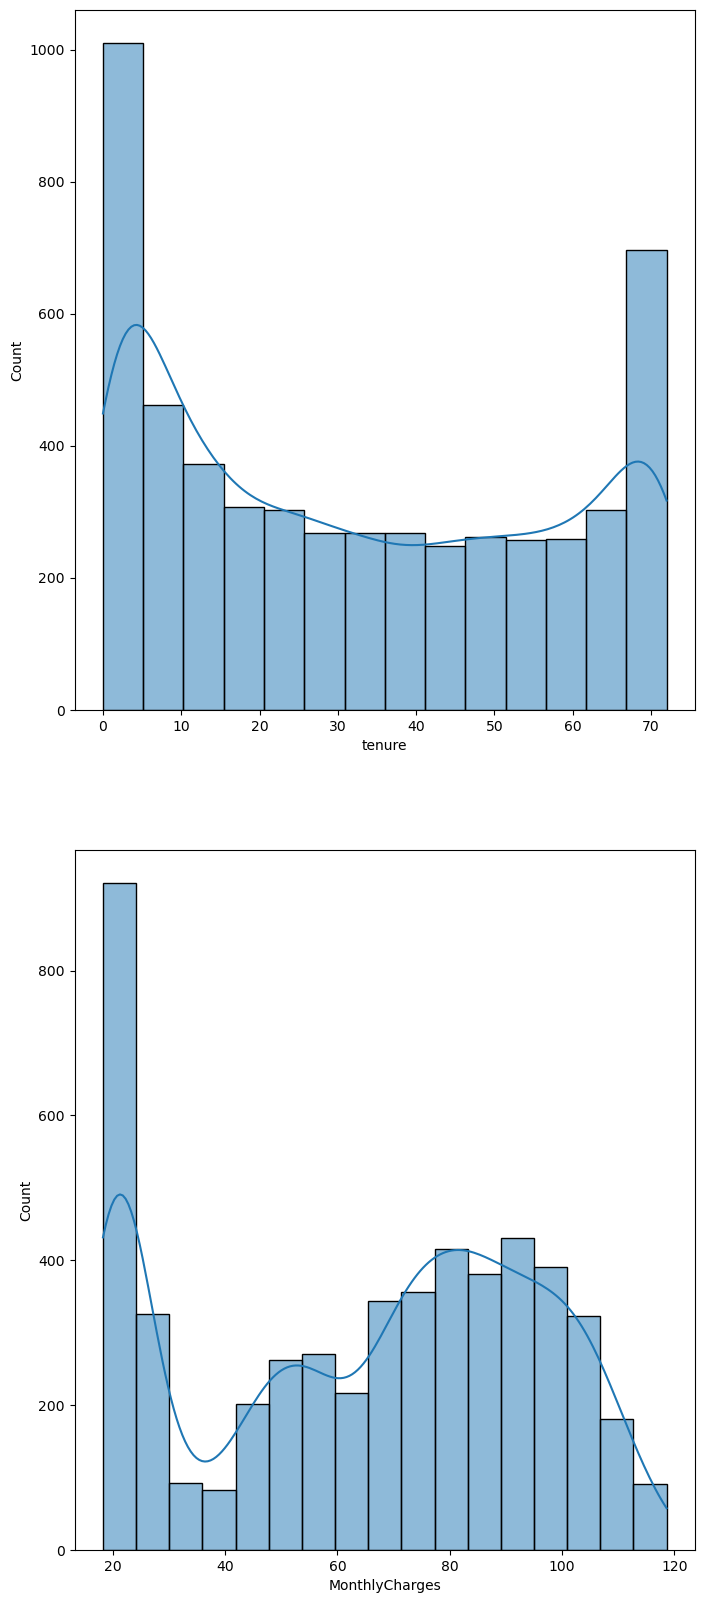

In [83]:
# Check X_train distributions
fig, ax = plt.subplots(len(X_train.select_dtypes(np.number).columns), 1, figsize=(8,20))
i = 0
for col in X_train.select_dtypes(np.number).columns:
    sns.histplot(data=X_train, x=col, ax=ax[i], kde=True)
    i += 1

In [84]:
X_train.select_dtypes(np.number).skew()

tenure            0.23658
MonthlyCharges   -0.22007
dtype: float64

In [87]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [90]:
X_train_cat.index

Index([6607, 2598, 2345, 4093,  693, 1513, 6067, 6105, 6189,  110,
       ...
       5334,  466, 6265, 5734, 3092, 3772, 5191, 5226, 5390,  860],
      dtype='int64', length=5282)

In [101]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

X_train_cat_enc = ohe.fit_transform(X_train_cat).toarray()
X_test_cat_enc = ohe.transform(X_test_cat).toarray()

features = ohe.get_feature_names_out()

X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, columns=features, index=X_train_cat.index)
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc, columns=features, index=X_test_cat.index)

X_train_cat_enc_df.head()

,SeniorCitizen_True
6607,0.0
2598,0.0
2345,0.0
4093,0.0
693,0.0


In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_tran = scaler.transform(X_train_num)
X_test_num_tran = scaler.transform(X_test_num)

X_train_num_tran_df = pd.DataFrame(X_train_num_tran, columns=X_train_num.columns, index=X_train_num.index) 
X_test_num_tran_df = pd.DataFrame(X_test_num_tran, columns=X_train_num.columns, index=X_test_num.index) 

X_train_num_tran_df.head()

,tenure,MonthlyCharges
6607,0.013889,0.070254
2598,0.097222,0.567015
2345,0.055556,0.017937
4093,0.402778,0.575486
693,0.041667,0.566517


In [104]:
X_train_transformed = pd.concat([X_train_num_tran_df, X_train_cat_enc_df], axis=1)
X_test_transformed = pd.concat([X_test_num_tran_df, X_test_cat_enc_df], axis=1)

In [105]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [106]:
y_test_pred = classification.predict(X_test_transformed)
print(y_test_pred)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred))
classification.score(X_test_transformed, y_test) # Accuracy for classification models and R2 for regression mnodels

['No' 'No' 'No' ... 'No' 'No' 'No']
0.7978421351504826


0.7978421351504826

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred)

array([[1188,   94],
       [ 262,  217]])

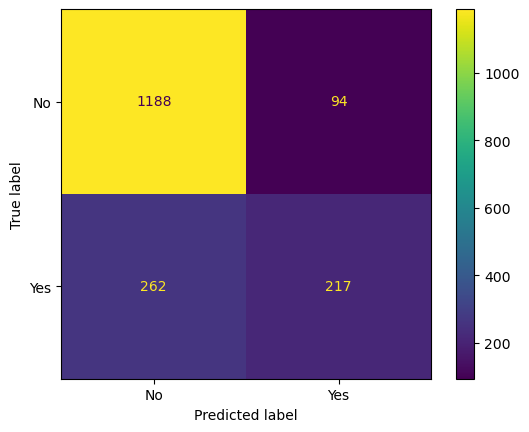

In [108]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

# Fail to identify 51% of churn customers

In [109]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred)

0.42655856106368883

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1282
         Yes       0.70      0.45      0.55       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761



<Axes: xlabel='Churn', ylabel='count'>

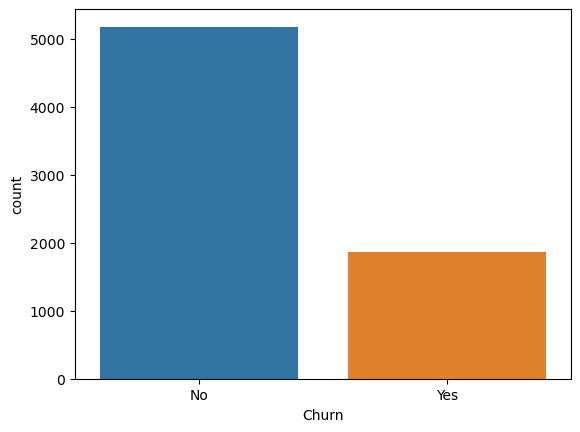

In [123]:
sns.countplot(data=data, x='Churn')
# Significantly more customers who are not identified as churn compared to those that are. 

In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE3,y_train_SMOTE3 = sm.fit_resample(X_train_transformed, y_train)

In [138]:
y_train_SMOTE3.value_counts()

Churn
Yes    3892
No     3892
Name: count, dtype: int64

In [139]:
display(X_train_transformed.shape)
display(X_train_SMOTE3.shape)

(5282, 3)

(7784, 3)

In [140]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_SMOTE3, y_train_SMOTE3)

y_test_pred_SMOTE3 = classification.predict(X_test_transformed)
print(y_test_pred_SMOTE3)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred_SMOTE3))
classification.score(X_test_transformed, y_test)

['No' 'No' 'No' ... 'No' 'Yes' 'No']
0.740488358886996


0.740488358886996

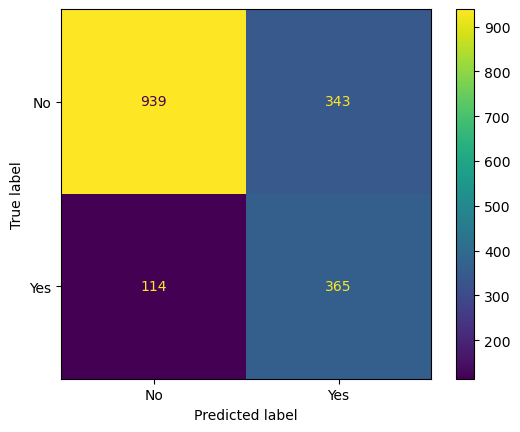

In [141]:
cm_test = confusion_matrix(y_test,y_test_pred_SMOTE3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classification.classes_)
disp.plot()
plt.show()

In [142]:
cohen_kappa_score(y_test, y_test_pred_SMOTE3)
# Slight improvement with SMOTE

0.43006197403336865

In [143]:
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_SMOTE3))
""" 
With SMOTE with k=3, precision drops but kappa, recall and f1 improves for correctly identifying Churn customers.


"""

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1282
         Yes       0.70      0.45      0.55       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1282
         Yes       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



' \nWith SMOTE with k=3, precision drops but kappa, recall and f1 improves for correctly identifying Churn customers.\n\n\n'

In [144]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=6)

X_train_SMOTE6,y_train_SMOTE6 = sm.fit_resample(X_train_transformed, y_train)

In [145]:
y_train_SMOTE6.value_counts()

Churn
Yes    3892
No     3892
Name: count, dtype: int64

In [146]:
display(X_train_transformed.shape)
display(X_train_SMOTE6.shape)

(5282, 3)

(7784, 3)

In [147]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_SMOTE6, y_train_SMOTE6)

y_test_pred_SMOTE6 = classification.predict(X_test_transformed)
print(y_test_pred_SMOTE6)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred_SMOTE6))
classification.score(X_test_transformed, y_test)

['No' 'No' 'No' ... 'No' 'Yes' 'No']
0.740488358886996


0.740488358886996

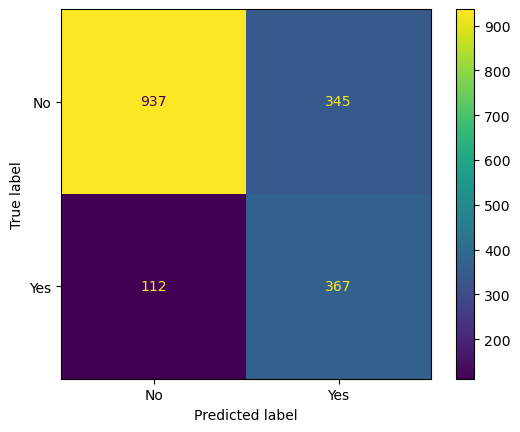

In [148]:
cm_test = confusion_matrix(y_test,y_test_pred_SMOTE6)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classification.classes_)
disp.plot()
plt.show()

In [149]:
cohen_kappa_score(y_test, y_test_pred_SMOTE6)
# Slight improvement with SMOTE

0.4313554801078251

In [153]:
""" 
With SMOTE with k=6, No major difference in classification scores, including kappa between SMOTE k=3 and SMOTE k=6.
"""
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_SMOTE3))
print(classification_report(y_test, y_test_pred_SMOTE6))


              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1282
         Yes       0.70      0.45      0.55       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1282
         Yes       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1282
         Yes       0.52      0.77      0.62       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761

